## This code uses TweetyBERT's Decoder output to find the phrase duration of the birds across days, as well as graph the syntax/song structure of the song for one bird.

## Step 1: Use the .json file and file name to find the dates and times of the recordings to the dataframe

In [3]:
import pandas as pd

recording_file_path_name = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/DECODER_outputs/5288_decoded.csv'
decoder_dataframe = pd.read_csv(recording_file_path_name)
path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/DECODER_outputs/USA5288_creation_data.json'

In [4]:
import pandas as pd
import json

# Function to extract date and time from the file name
def find_recording_dates_and_times(recording_file_path_name):
    try:
        # Split the full path to isolate the file name
        split_path_by_dashes = recording_file_path_name.split('/')
        file_name = split_path_by_dashes[-1]
        
        # Split the file name by underscores to extract relevant parts
        split_file_name_by_underscores = file_name.split('_')
        
        # Extract animal ID
        animal_id = split_file_name_by_underscores[0]
        
        # Extract month and ensure it has two digits
        month = split_file_name_by_underscores[2]
        if int(month) < 10:
            month = '0' + month
        
        # Extract day and ensure it has two digits
        day = split_file_name_by_underscores[3]
        if int(day) < 10:
            day = '0' + day
        
        # Combine month and day to form the date in MM.DD format
        date = month + '.' + day
        
        # Extract time components
        hour = split_file_name_by_underscores[4]
        minute = split_file_name_by_underscores[5]
        
        # Extract seconds and remove the file extension
        second = split_file_name_by_underscores[6][0:-4]  # Removes '.wav'
        
        return animal_id, date, hour, minute, second

    except IndexError:
        # Handle cases where the file name format is unexpected
        print(f"Error: Unexpected format in file name {recording_file_path_name}")
        return None, None, None, None, None

    except Exception as e:
        # Handle any other unexpected errors
        print(f"Error processing file {recording_file_path_name}: {e}")
        return None, None, None, None, None

# Function to find the number of unique syllable labels
def find_unique_labels(data_frame):
    unique_labels = set()
    
    # Iterate through the 'Annotations' column
    for annotations in data_frame['Annotations']:
        if annotations is not None:  # Check if the entry is not None
            # Convert the JSON string to a dictionary
            annotations_dict = json.loads(annotations)
            
            # Add the keys (labels) from the dictionary to the set
            unique_labels.update(annotations_dict.keys())
    
    total_unique_labels = len(unique_labels)
    return total_unique_labels, unique_labels

# Function to find the number of different days
def find_unique_days(data_frame):
    unique_dates = data_frame['Date'].unique()  # Extract unique dates
    number_of_unique_days = len(unique_dates)   # Count the number of unique dates
    return number_of_unique_days, unique_dates

# Function to create a table from the DataFrame and find unique labels and days
def make_table(input_data_frame):
    # Filter and reset index
    only_song_data = input_data_frame[input_data_frame['song_present'] == True].reset_index(drop=True)
    num_files_with_song = only_song_data.shape[0]   

    # Initialize organized DataFrame
    organized_data_frame = pd.DataFrame({'Animal ID': [None] * num_files_with_song,
                                         'Date': [None] * num_files_with_song,
                                         'Hour': [None] * num_files_with_song,
                                         'Minute': [None] * num_files_with_song,
                                         'Second': [None] * num_files_with_song,
                                         'Annotations': [None] * num_files_with_song})

    for i, row in only_song_data.iterrows():
        recording_file_path_name = row['file_name']
        try:
            animal_id, date, hour, minute, second = find_recording_dates_and_times(recording_file_path_name)
            organized_data_frame.at[i, 'Animal ID'] = animal_id
            organized_data_frame.at[i, 'Date'] = date
            organized_data_frame.at[i, 'Hour'] = hour
            organized_data_frame.at[i, 'Minute'] = minute
            organized_data_frame.at[i, 'Second'] = second
        except Exception as e:
            # Log the error and continue, or set these to a default value
            print(f"Error processing file {recording_file_path_name}: {e}")
            continue
        # Handle annotations safely
        organized_data_frame.at[i, 'Annotations'] = row.get('syllable_onsets/offsets', None)
    
    # Call the functions to find unique labels and days
    total_unique_labels, unique_labels = find_unique_labels(organized_data_frame)
    number_of_unique_days, unique_dates = find_unique_days(organized_data_frame)
    
    # Output the results
    print(f"Total number of unique dictionary labels: {total_unique_labels}")
    print(f"Unique labels: {unique_labels}")
    print(f"Number of different days: {number_of_unique_days}")
    print(f"Unique days: {unique_dates}")
    print(f"First rows of organized_data_frame: {organized_data_frame.head(3)}")

    return organized_data_frame, unique_dates, unique_labels

# Run stuff through the make_tables function so I can work with the outputs
organized_data_frame, unique_dates, unique_labels = make_table(decoder_dataframe)

Total number of unique dictionary labels: 0
Unique labels: set()
Number of different days: 12
Unique days: ['03.04' '03.05' '03.14' '03.15' '03.16' '03.17' '03.18' '03.19' '03.20'
 '03.21' '03.22' '03.23']
First rows of organized_data_frame:   Animal ID   Date Hour Minute Second Annotations
0   USA5288  03.04    9      2     27        None
1   USA5288  03.04    9      2      0        None
2   USA5288  03.04    9      0     38        None


## Step 2: Filter the data to only include files with songs, and graph the number of songs recorded from each day.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to only include rows where song_present is True
filtered_decoded_csv_data = decoded_csv_data[decoded_csv_data['song_present'] == True]

# Convert 'date' column to datetime for easier manipulation
filtered_decoded_csv_data['date'] = pd.to_datetime(filtered_decoded_csv_data['date'])

# Finding the earliest and latest dates
earliest_day = filtered_decoded_csv_data['date'].min()
latest_day = filtered_decoded_csv_data['date'].max()

# Print the earliest and latest day
print(f"Earliest day: {earliest_day}")
print(f"Latest day: {latest_day}")

# Count how many files have song_present as True per day
song_count_per_day = filtered_decoded_csv_data.groupby(filtered_decoded_csv_data['date'].dt.date).size()

# Create a full date range from the earliest to the latest date
full_date_range = pd.date_range(start=earliest_day, end=latest_day)

# Reindex the song_count_per_day to include all dates in the range, filling missing values with 0
song_count_per_day = song_count_per_day.reindex(full_date_range, fill_value=0)

# Convert the index to just the date part for better labeling
song_count_per_day.index = song_count_per_day.index.date

# Treatment date (this should be a date object, replace with the actual treatment date if needed)
treatment_date = pd.to_datetime('2024-04-09').date()

# Plot the number of files with song_present as True per day
plt.figure(figsize=(8, 5))
song_count_per_day.plot(kind='bar')
plt.title('Number of files with song(s) present per day')
plt.xlabel('Date')
plt.ylabel('Number of files')
plt.xticks(rotation=90)  # Rotate the labels 90 degrees for better legibility
plt.tight_layout()

# Add a red dashed vertical line at the treatment date
plt.axvline(x=treatment_date, color='red', linestyle='--', label='Treatment Date')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

KeyError: 'date'

## Step 3: Calculate phrase durations of one syllable type across each day.

In [33]:
import ast

# Function to calculate the duration of a specified syllable
def calculate_syllable_duration(data_frame, syllable_label, entry_index):
    # Get the syllable_onsets_offsets_ms column for the specified entry
    syllable_onsets_offsets_ms = data_frame.loc[entry_index, 'syllable_onsets_offsets_ms']
    
    # Convert the string representation to a dictionary
    syllable_onsets_offsets_dict = ast.literal_eval(syllable_onsets_offsets_ms)
    
    # Find the onset and offset for the specified syllable
    if syllable_label in syllable_onsets_offsets_dict:
        syllable_onset_offset = syllable_onsets_offsets_dict[syllable_label][0]
        syllable_duration = syllable_onset_offset[1] - syllable_onset_offset[0]
        return syllable_duration
    else:
        return None  # Syllable not found

# Example usage: Calculate the duration of syllable '14' for the first entry (index 12)
syllable_label = '14'
entry_index = 12  # Adjust this index based on your actual DataFrame
syllable_duration = calculate_syllable_duration(filtered_decoded_csv_data, syllable_label, entry_index)

if syllable_duration is not None:
    print(f"The duration of syllable '{syllable_label}' for entry {entry_index} is {syllable_duration} milliseconds.")
else:
    print(f"Syllable '{syllable_label}' not found in entry {entry_index}.")

The duration of syllable '14' for entry 12 is 261.7460317460318 milliseconds.


In [34]:
# Check the column names
print("Column names in the dataset:", filtered_decoded_csv_data.columns)

# Filter the dataset to only include the first day of recording
first_day = filtered_decoded_csv_data['date'].min()
first_day_data = filtered_decoded_csv_data[filtered_decoded_csv_data['date'] == first_day]

# Print all the data collected from the first day
print(first_day_data['syllable_onsets_offsets_ms'])

import ast

# Function to calculate all durations of a specified syllable for a given dataset
def calculate_all_syllable_durations(data_frame, syllable_label):
    durations = []
    for index, row in data_frame.iterrows():
        # Get the syllable_onsets_offsets_ms column for each entry
        syllable_onsets_offsets_ms = row.get('syllable_onsets_offsets_ms', None)
        
        if syllable_onsets_offsets_ms:
            # Convert the string representation to a dictionary
            syllable_onsets_offsets_dict = ast.literal_eval(syllable_onsets_offsets_ms)
            
            # Check if the specified syllable exists
            if syllable_label in syllable_onsets_offsets_dict:
                # Loop through all onset-offset pairs for this syllable
                for onset_offset in syllable_onsets_offsets_dict[syllable_label]:
                    syllable_duration = onset_offset[1] - onset_offset[0]
                    durations.append(syllable_duration)
    
    return durations

# Calculate all of syllable '14's durations from the first day
syllable_14_durations_first_day = calculate_all_syllable_durations(first_day_data, '14')

# Display the result
syllable_14_durations_first_day


Column names in the dataset: Index(['file_name', 'song_present', 'syllable_onsets_offsets_ms',
       'syllable_onsets_offsets_timebins', 'animal_id', 'date', 'time'],
      dtype='object')
12     {'8': [[0.0, 1376.1904761904764]], '21': [[137...
18     {'8': [[0.0, 1041.5873015873017]], '21': [[104...
19     {'8': [[0.0, 1805.2380952380954]], '21': [[180...
27     {'27': [[0.0, 1586.6666666666667]], '23': [[15...
29     {'10': [[0.0, 1235.873015873016]], '23': [[123...
                             ...                        
674    {'1': [[0.0, 2110.15873015873]], '20': [[2110....
681    {'1': [[0.0, 779.8412698412699]], '20': [[779....
688    {'1': [[0.0, 2234.285714285714]], '9': [[2234....
689    {'1': [[0.0, 1783.6507936507937]], '20': [[178...
690    {'1': [[0.0, 1319.5238095238096]], '20': [[131...
Name: syllable_onsets_offsets_ms, Length: 188, dtype: object


[261.7460317460318,
 110.63492063492049,
 1208.8888888888891,
 393.968253968254,
 868.8888888888896,
 653.0158730158731,
 183.4920634920636,
 237.46031746031713,
 2091.2698412698414,
 1853.8095238095239,
 1011.9047619047619,
 852.6984126984128,
 971.4285714285716,
 1254.7619047619046,
 858.0952380952382,
 984.9206349206352,
 1314.126984126984,
 968.730158730159,
 1489.5238095238096,
 70.15873015873012,
 178.0952380952382,
 40.476190476190595,
 5.396825396825534,
 8.095238095238301,
 137.6190476190477,
 1073.9682539682544,
 1373.4920634920636,
 782.5396825396826,
 1025.396825396825,
 1025.396825396825,
 1038.8888888888891,
 331.9047619047619,
 607.1428571428569,
 40.47619047619048,
 1368.0952380952376,
 1292.5396825396829,
 1368.095238095238,
 1419.3650793650795,
 215.8730158730159,
 1578.5714285714284,
 744.7619047619048,
 1289.8412698412699,
 186.19047619047615,
 1284.4444444444443,
 35.07936507936508,
 696.1904761904761,
 563.968253968254,
 1020.0,
 1168.4126984126985,
 1030.79365079

In [35]:
import ast
import pandas as pd

# Filter the dataset to only include data from March 23rd, 2024
march_23_data = filtered_decoded_csv_data[filtered_decoded_csv_data['date'] == pd.to_datetime('2024-03-23')]

# Function to calculate all durations of a specified syllable for a given dataset
def calculate_all_syllable_durations(data_frame, syllable_label):
    durations = []
    for index, row in data_frame.iterrows():
        # Get the syllable_onsets_offsets_ms column for each entry
        syllable_onsets_offsets_ms = row.get('syllable_onsets_offsets_ms', None)
        
        if syllable_onsets_offsets_ms:
            # Convert the string representation to a dictionary
            syllable_onsets_offsets_dict = ast.literal_eval(syllable_onsets_offsets_ms)
            
            # Check if the specified syllable exists
            if syllable_label in syllable_onsets_offsets_dict:
                # Loop through all onset-offset pairs for this syllable
                for onset_offset in syllable_onsets_offsets_dict[syllable_label]:
                    syllable_duration = onset_offset[1] - onset_offset[0]
                    durations.append(syllable_duration)
    
    return durations

# Calculate all of syllable '15's durations from March 23rd
syllable_14_durations_march_23 = calculate_all_syllable_durations(march_23_data, '14')

# Display the result
syllable_14_durations_march_23


[1567.7777777777778,
 1694.6031746031747,
 933.6507936507937,
 1481.4285714285716,
 998.4126984126984,
 110.63492063492095,
 342.6984126984127,
 126.82539682539675,
 1586.666666666667,
 156.50793650793685,
 86.34920634920636,
 1009.2063492063489,
 1403.1746031746034,
 1346.5079365079366,
 1397.7777777777778,
 256.3492063492064,
 1797.1428571428573,
 1322.2222222222224,
 1791.7460317460318,
 1208.888888888889,
 1357.3015873015875,
 1133.3333333333335,
 823.015873015873,
 1351.904761904762,
 196.984126984127,
 1381.5873015873017,
 299.5238095238095,
 62.06349206349205,
 10.793650793651068,
 75.55555555555556,
 291.42857142857156,
 1826.8253968253969,
 2123.6507936507937,
 1802.5396825396826,
 1141.4285714285716,
 53.968253968253975,
 1600.1587301587304,
 750.1587301587302,
 2320.634920634921,
 70.15873015873058,
 1583.968253968254,
 620.6349206349207,
 1635.2380952380954,
 1303.3333333333335,
 148.41269841269832,
 1233.1746031746034,
 194.28571428571422,
 1467.936507936508,
 232.06349206

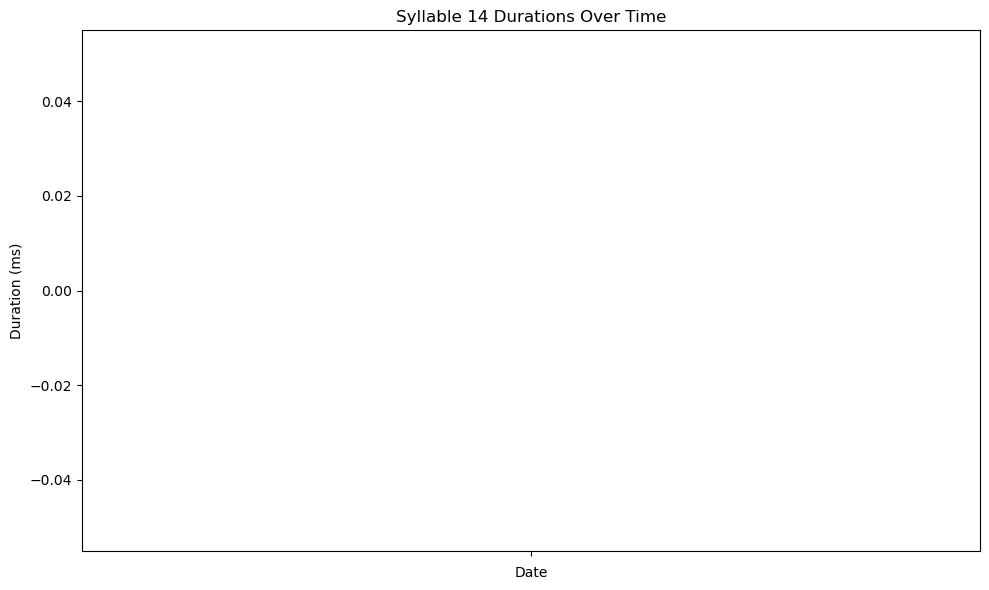

In [36]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate all durations of a specified syllable for a given dataset
def calculate_syllable_durations_by_day(data_frame, syllable_label):
    daily_durations = {}
    
    # Group the data by date
    grouped_data = data_frame.groupby('date')
    
    # Iterate over each day in the dataset
    for date, group in grouped_data:
        durations = []
        for index, row in group.iterrows():
            # Get the syllable_onsets_offsets_ms column for each entry
            syllable_onsets_offsets_ms = row.get('syllable_onsets_offsets_ms', None)
            
            if syllable_onsets_offsets_ms:
                # Convert the string representation to a dictionary
                syllable_onsets_offsets_dict = ast.literal_eval(syllable_onsets_offsets_ms)
                
                # Check if the specified syllable exists and calculate the durations
                if syllable_label in syllable_onsets_offsets_dict:
                    # Loop through all onset-offset pairs for this syllable
                    for onset_offset in syllable_onsets_offsets_dict[syllable_label]:
                        syllable_duration = onset_offset[1] - onset_offset[0]
                        durations.append(syllable_duration)
        
        # Only store data if there were durations for this syllable on that day
        if durations:
            daily_durations[date] = durations
    
    return daily_durations

# Find the earliest and latest days in the dataset
earliest_day = filtered_decoded_csv_data['date'].min()
latest_day = filtered_decoded_csv_data['date'].max()

# Generate all the days between the earliest and latest day
full_date_range = pd.date_range(start=earliest_day, end=latest_day)

# Calculate syllable '14's durations for each day
syllable_14_durations_by_day = calculate_syllable_durations_by_day(filtered_decoded_csv_data, '14')

# Prepare the data for plotting
durations = []
dates_with_labels = []

# Go through the full date range, adding either the durations for syllable 14 or a blank entry
for date in full_date_range:
    date_only = date.date()  # Convert to date object
    if date_only in syllable_14_durations_by_day:
        durations.extend(syllable_14_durations_by_day[date_only])
        dates_with_labels.append(date_only)
    else:
        # Add blank spaces for days without data
        durations.append(None)
        dates_with_labels.append('')

# Plot the durations for syllable '14'
plt.figure(figsize=(10, 6))
plt.plot(dates_with_labels, durations, marker='o', linestyle='-', color='b')
plt.title('Syllable 14 Durations Over Time')
plt.xlabel('Date')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)

# Only show labels for days with data
plt.tight_layout()
plt.show()


## Step 4: Adjust previous code to grap the phrase duration of each syllable type across each day.


## Step 5: Make a function that graphs ALL of the syllables across each day.

## Step 6: Adjust previous code to figure out the transition types and frequencies for each song.

## Step 7: Generate syntax diagrams (histogram, normalized transition matrix, syntax connectivity diagram)